<a href="https://www.kaggle.com/code/vijays140291/bank-note-authen-with-randomforest-classifier?scriptVersionId=122424433" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Random Forest Classifier
Random Forest Classifier is a powerful machine learning algorithm that is widely used for classification tasks in various domains, including finance, healthcare and marketing. It is an ensemble method that combines multiple decision trees to produce a final output. In this algorithm, each decision tree in the forest is built usind a randomly selected subset of the data, and the final output is determined by the majority vote of the trees,
The main advantage of the Random Forest Classifier over other classification alogrithms is its ability to handle high-dimensional feature spaces and larget dataset. This is achieved by building multiple decision tree, each with a randomly selected subset uf features, to reduce the risk of overfitting and improve generalization performance. Random Forest Classifier can also handle missing values in the data and can provide an estimate of feature importance making it a popular choice for feature selection tasks.
the Random forest Classifier algorithm consists of three main steps.
1 Randomly selected a subset of data from the original dataset.
2 Build a decision tree using the selected data subset by recursively partitioning the data based on the values of the features.
3 Repeat steps 1 and 2 multiple times to build a forest a decision trees.
During the training phase, the algorithm builds a forest of decision trees by repeating the aboce steps a specified number of times. Each decision tree is build independently using a randomly selected subset of features and data, which reduced the risk of overfitting and makes the model more robust to noise and outliers in the data.
Once the forest is build the Random forest Classifier can be used to classify new data by passing it through each decision tree in the forest and aggregating the results. The final output is determined by the majority vote of the decision trees. This approach reduces the rosk of bias and increases the accuracy of the model.
One of the key benefits of Randomr Forest classifier is its ability to provide an estimate of feature importance.

This is useful for feature selection task where the goal is to identify the most relevant features for a particular classification problem. The algorithm calculate the importance of each feature by measuring how much the accuracy of the model decreases when that feature is removed. This information can be used to select the most informative features for a particular task. 
Random Forest Classifier is also capable of handling missing values in th data. When a new instance is passed to the model for classification, the algorithm can use the available features to make a prediction even if some of the feature values are missing. This makes the algorithm more robust to missing data which is a common problem in real-world datasets.
In conclusion Random Forest Classifier is a powerful machine learning algorithm is widely used for classification tasks. It combines mutlple decisions trees to produce a final output, which reduces the risk of overfitting and increased the accuracy of the model. It can handle high-dimensional feature spaces and larget datasets, and it is capable of providing an estimate of feature importance. The algorithm is robust to noise and outliers in the data, and it can handle missing values, making it a popular choice for real-world applications



# Predicting Bank Note Authentication

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf



# Importing the Data

In [3]:
df=pd.read_csv('/kaggle/input/banknote-authenticationcsv/BankNote_Authentication.csv')
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


# Checking the Preliminary Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


# Checking for Missing Value in the Dataset

In [5]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

* There is no missing values in the dataset

# Getting the Statistical Information about continouous features

In [6]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


# Class distribution of Target column

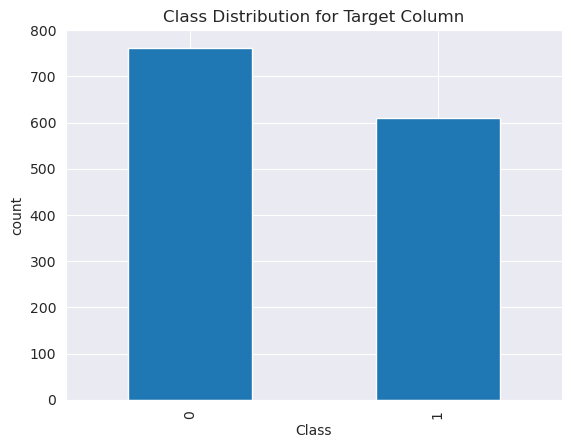

In [9]:
df['class'].value_counts().plot(kind='bar')
plt.title('Class Distribution for Target Column')
plt.ylabel('count')
plt.xlabel('Class')
plt.show()

# Univariant Analysis with Histogram

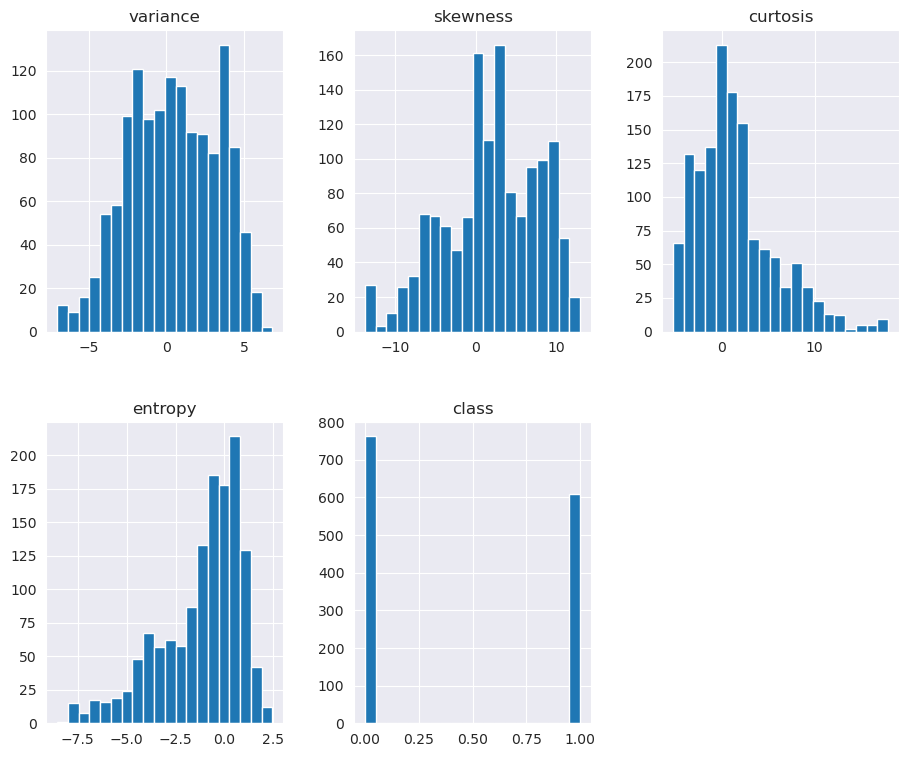

In [12]:
df.hist(bins=20,figsize=(11,9),layout=(2,3))
plt.show()

# PairPlot for Target Column with respect to Features Columns

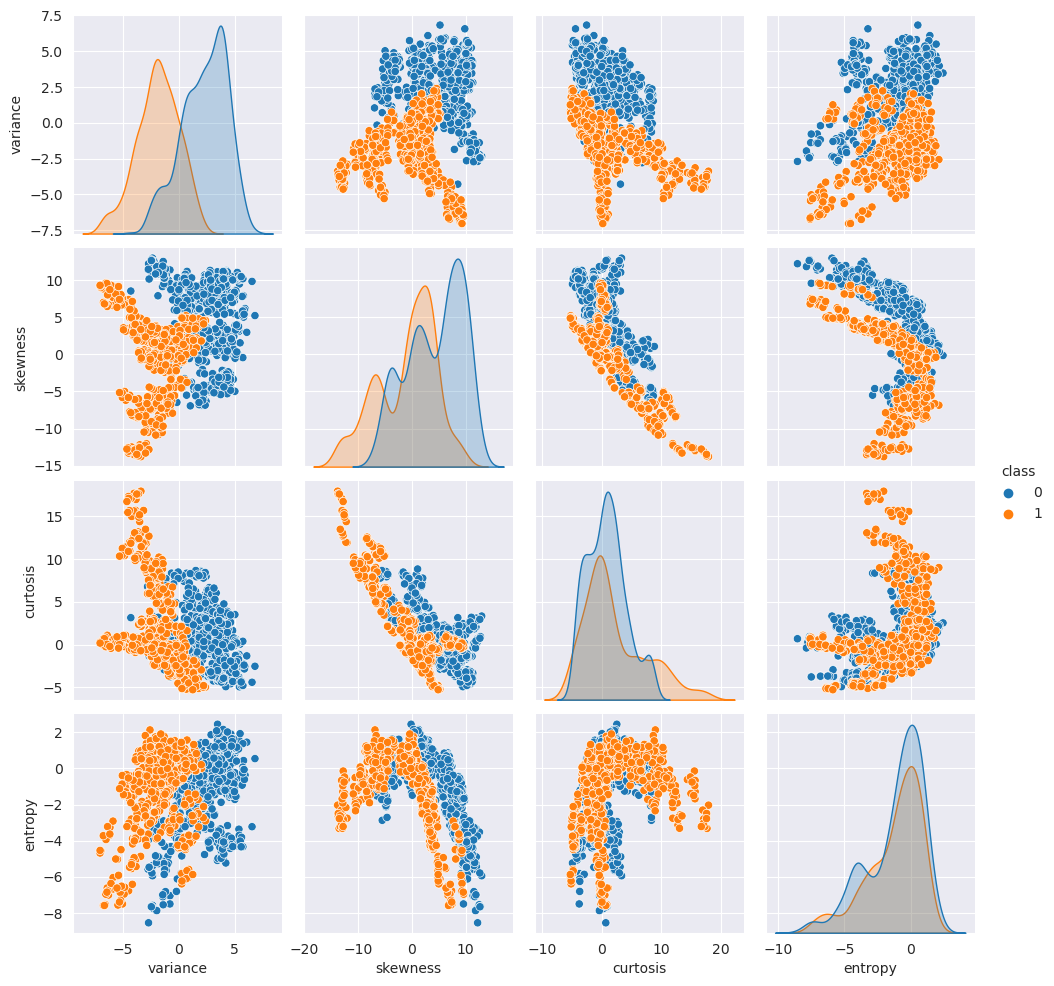

In [16]:
sns.pairplot(df,hue='class')
plt.show()

# Checking for Correlation Matrix

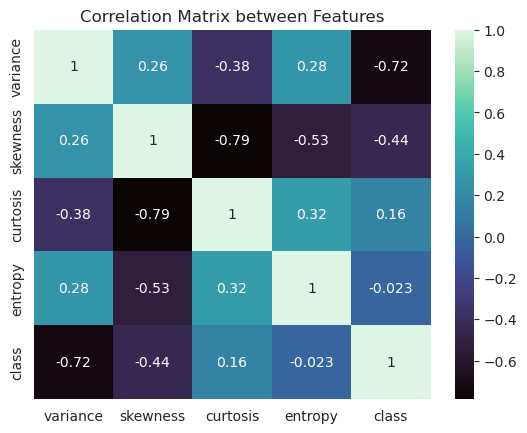

In [18]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='mako')
plt.title('Correlation Matrix between Features')
plt.show()

# Preprocessing Function

In [28]:
def preprocess_inputs(df):
    df=df.copy()
    #splitting the data between target and feature dataset
    y=df['class']
    x=df.drop('class',axis=1)
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
    #scaling the dataset
    
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
    
    return x_train,x_test,y_train,y_test
    
    
    
    

In [29]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 4)
(412, 4)
(960,)
(412,)


# Randomn Forest Classifier

In [31]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
print(model.score(x_test,y_test))

0.9951456310679612


# Checking the Accuracy with Confusion Matrix, and Classification Report

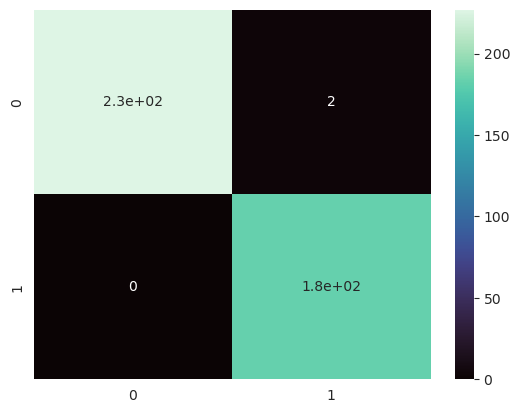

In [34]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='mako')
plt.show()

# Classication Report

In [35]:
clr=classification_report(y_pred,y_test)
print(clr)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       227
           1       1.00      0.99      0.99       185

    accuracy                           1.00       412
   macro avg       1.00      0.99      1.00       412
weighted avg       1.00      1.00      1.00       412

